<a href="https://colab.research.google.com/github/ds4geo/ds4geo/blob/master/WS%202020%20Course%20Notes/Session%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TODO

* Intro
* Expand filtering filtering intro lecture
* Expand advanced filtering lecture notes
* fully prepare 6.5
* example datasets for 6.5

Take out advanced filtering with numpy workshop? Rather, incorporate into the pandas version section, and provide time for pandas resampling from previous week? Better this way and reduce time pressure - better more time and practice rather than also showing numpy method.
ACTUALLY: remove even the convolving and numpy part and do all in pandas!? Then start with pandas interp/resampling

# **Data Science for Geoscientists - Winter Semester 2020**
# **Session 6 - Smoothing and Filtering - 11th November 2020**

Last week we looked at resampling and interpretation. A key application of these methods is to allow timeseries to be directly compared. Another important part of working with timeseries data (amongst others!) is filtering and smoothing. We often work with data with a significant noise component which must be removed to allow meaningful analysis or visualisation.

Instead of using Numpy, we will use Pandas from the begining, starting with an overview of how to use Pandas for the resampling and interpolation tasks from last week.

# Part 6.1 - Resampling with Pandas - *Walkthrough*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
air_temp = pd.read_excel("https://github.com/ds4geo/ds4geo/raw/master/data/timeseries/Au%C3%9Fenluft%2BEingangslabyrinth.xlsx",
                         sheet_name="Daten3", usecols=[0,6], names=["time", "air_temp"])
cave_temp = pd.read_excel("https://github.com/ds4geo/ds4geo/raw/master/data/timeseries/Au%C3%9Fenluft%2BEingangslabyrinth.xlsx",
                          sheet_name="Daten3", usecols=[8,9], names=["time", "cave_temp"])
cave_CO2 = pd.read_excel("https://github.com/ds4geo/ds4geo/raw/master/data/timeseries/CO2%20_compiled.xlsx",
                         sheet_name="Data Stream (2)", names=["time", "unknown", "d13C", "d18O", "ppm CO2", "ctime"])

## Part 6.1.1 - Upsampling outside air temperature data

In [3]:
# drop blank data
air_temp = air_temp.dropna(axis=0)

# drop duplicates
air_temp.drop_duplicates("time", inplace=True)

# Set datetime index
air_temp.index = air_temp.time


In [4]:
air_15m = air_temp["air_temp"].resample("15T").interpolate("cubic") # linear, cubic, quadratic, linear, slinear,

(5.0, 22.0)

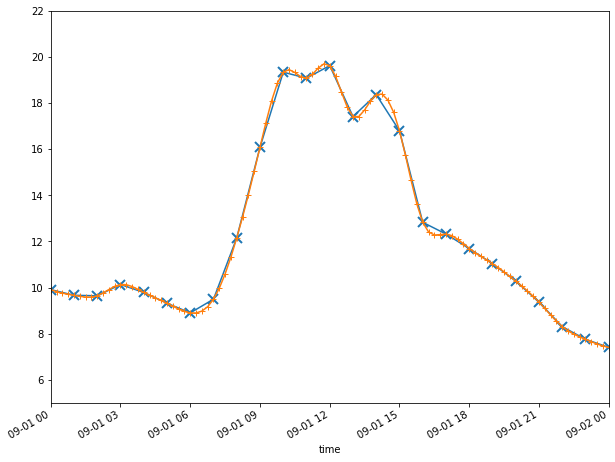

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
air_temp["air_temp"].plot(ax=ax, marker="x", markersize=10, markeredgewidth=2)
air_15m.plot(ax=ax, marker="+")
ax.set_xlim("2015-09-01","2015-09-02")
ax.set_ylim(5,22)


## Part 6.1.2 - Downsampling Cave CO2 data


In [7]:
# drop blank data
cave_CO2 = cave_CO2.dropna(axis=0)

# drop duplicates
cave_CO2.drop_duplicates("time", inplace=True)

# Set datetime index
cave_CO2.index = cave_CO2.time

In [10]:
cave_CO2

,time,unknown,d13C,d18O,ppm CO2,ctime
time,,,,,,
2015-05-29 13:53:53.213,2015-05-29 13:53:53.213,UNKNOWN,-8.577,8.318,400.6349,42153.579088
2015-05-29 13:58:53.233,2015-05-29 13:58:53.233,UNKNOWN,-8.453,9.127,400.1232,42153.582561
2015-05-29 14:03:53.237,2015-05-29 14:03:53.237,UNKNOWN,-8.251,9.393,399.3580,42153.586033
2015-05-29 14:08:53.241,2015-05-29 14:08:53.241,UNKNOWN,-8.805,8.888,408.6044,42153.589505
2015-05-29 14:17:54.254,2015-05-29 14:17:54.254,UNKNOWN,-8.984,8.574,407.1812,42153.595767
...,...,...,...,...,...,...
2015-11-22 23:44:57.539,2015-11-22 23:44:57.539,UNKNOWN,-9.365,2.448,413.2193,42330.989555
2015-11-22 23:50:58.555,2015-11-22 23:50:58.555,UNKNOWN,-9.344,2.443,413.1631,42330.993733
2015-11-22 23:55:58.544,2015-11-22 23:55:58.544,UNKNOWN,-9.343,2.507,413.1083,42330.997205


In [24]:
CO2_15m = cave_CO2["ppm CO2"].resample("15T").interpolate("linear")

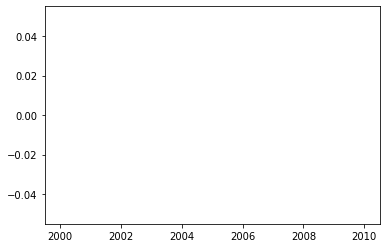

In [27]:
plt.plot(CO2_15m)

In [28]:
CO2_15m = cave_CO2["ppm CO2"].resample("15T").agg("mean")

(735860.0, 735863.0)

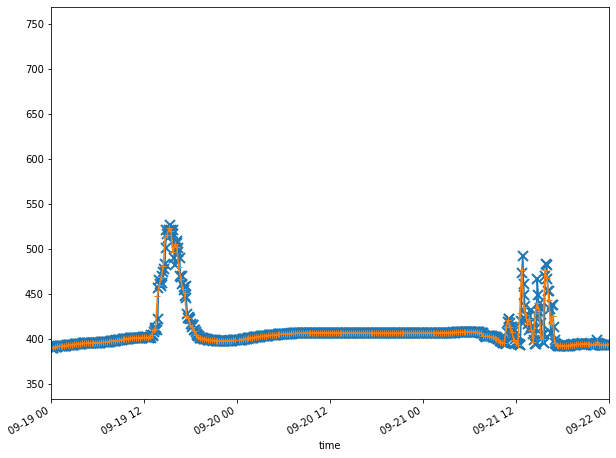

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
cave_CO2["ppm CO2"].plot(ax=ax, marker="x", markersize=10, markeredgewidth=2)
CO2_15m.plot(ax=ax, marker="+")
ax.set_xlim("2015-09-19","2015-09-22")
#ax.set_ylim(5,22)

#Part 6.1 - Introduction to data filtering - *Mini-lecture*

* Most common: moving/rolling averages
* Make a moving/rolling "window", and take average of values in window for each position across dataset.
* Simple application in Numpy:
 * Filter of 1/n (n=filter length)
 * convolve filter with data

* Pandas has simple rolling/smoothing methods to explore yourselves.


#Part 6.2 - Data filtering excercise - *Walkthrough/Workshop*
We will apply a simple moving average filter on a noisy dataset to smooth it.

You can either use a dataset of your choice (e.g. from the student submitted datasets), or use the following XRF core scanning data from an Antarctic sediment core: "https://doi.pangaea.de/10.1594/PANGAEA.859980?format=textfile " (V is particularly noisy).

1. Construct a filter: a 1d numpy array with length n and each value being 1/n (so its sum is 1). The length must be an odd number.

2. Apply the filter by convolving it with the data to be filtered using np.convolve.

3. Plot the original and smoothed data.

4. Experiment with different filter lengths.


# Part 6.3 - Advanced filtering - *Mini-lecture*
* Moving average filters equally weight importance of all data in the window.
* However, probably want to weight central points more than distant ones.
* Many more complex filter shapes exist, e.g. those in assignment task 1.
* Filtering is also possible in frequency domain with Fourier Transforms – not addressed in this course.


# Part 6.4 - Advanced filtering excercise - *Walkthrough/Workshop*

Numpy provides some more complex filters here: https://numpy.org/doc/stable/reference/routines.window.html (window means filter in this context).
Experiment with these filters and different lengths and compare them to moving average filters on the dataset from the previous section, or one of your own choosing. Investigate and comment on the differences and value of each approach.


# Part 6.5 - Filtering and Resampling in Pandas - *Walkthrough/Workshop*

We initially approached the topics of resampling/interpolation and filtering/smoothing with numpy to emphasise mathematically what is going on.

However, Pandas gives us effective tools to do it easliy and quickly, even though what is going on underneath is more hidden.

# Part 6.5.1 - Filtering/Smoothing in Pandas

Experiment with window based smoothing as we did above with Numpy, but using the `pd.DataFrame.rolling()` method in pandas. You can replicate what you did in the previous workshops, or experiment with a new dataset.

In particular implement a moving average filter and one of the advanced filters from 6.4 and compare the results.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
dat = pd.read_csv("https://doi.pangaea.de/10.1594/PANGAEA.859980?format=textfile", header=48, sep="\t")

In [31]:
dat_roll = dat.rolling(9,center=True, win_type='hamming').mean()
dat_roll2 = dat.rolling(9,center=True).mean()

(0.0, 120.0)

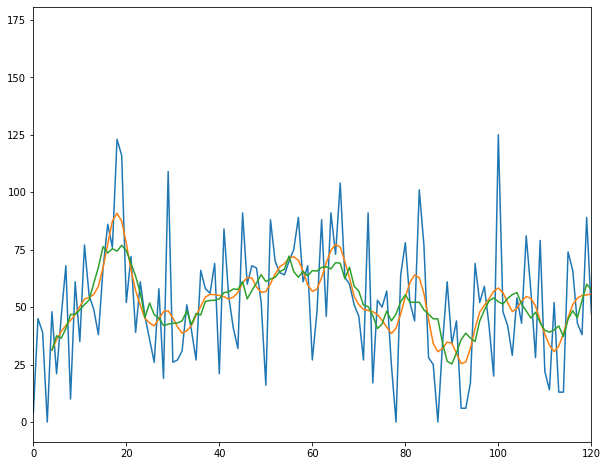

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(dat["V [cps]"])
ax.plot(dat_roll["V [cps]"])
ax.plot(dat_roll2["V [cps]"])
ax.set_xlim(0,120)

# Part 6.5.2 - Resampling/Interpolation in Pandas

*example datasets/tasks*
*create example, then they apply to dataset of their choice*

# Assignment
*next week discuss weather assignment plus data story telling and stats, but can start working on part 2 already*
*therefore, what is the expanded weather data assignment?*
*most important is effective story telling and communication*
*can expand to more cities, go into more detail on original cities, or focus on re-working existing with better story*

#References